In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models

In [52]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [30]:
x_test.shape

(10000, 32, 32, 3)

In [31]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

reshaping to a one dimensional array

In [32]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [33]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [34]:
classes[9]

'truck'

In [35]:
def plot_sample(x, y, index): 
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

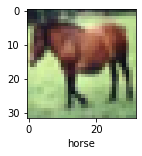

In [36]:
plot_sample(x_train, y_train, 7)

In [37]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [38]:
x_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [39]:
#normalization
x_train= x_train/255
x_test= x_test/255

In [40]:
ann= models.Sequential([
    layers.Flatten(input_shape=(32,32, 3)),
    layers.Dense(3000, activation= 'relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']

)
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8078 - accuracy: 0.3538
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6212 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5397 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4791 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4318 - accuracy: 0.4964


In [41]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4443 - accuracy: 0.4868


[1.4442510604858398, 0.4867999851703644]

In [42]:
#cnn model
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [43]:
cnn.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']

)

In [ ]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.5068 - accuracy: 0.4606
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1777 - accuracy: 0.5853
Epoch 3/10
 493/1563 [========>.....................] - ETA: 4s - loss: 1.0871 - accuracy: 0.6154

In [ ]:
cnn.evaluate(x_test, y_test)

In [57]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
plot_sample(x_test, y_test, 9)

In [55]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.2439425e-28, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [27]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

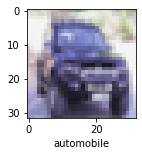

In [60]:
plot_sample(x_test, y_test, 9)

In [61]:
classes[y_classes[9]]

'automobile'